In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import wimprates as wr
wr.__version__

'0.3.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numericalunits as nu

In [5]:
from tqdm import tqdm

In [6]:
from scipy.integrate import quad as scipy_int

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

## HALO model ##



c:\users\joran\google drive\phd-master\ubuntu-storage\windows-anaconda\forked_wimprates\wimprates\halo.py:129: RuntimeWarning: divide by zero encountered in true_divide
  / (2 * v_earth_t * v))


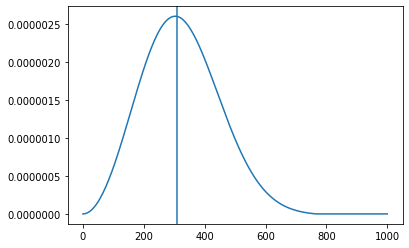

In [7]:
x = np.linspace(0,1000,200) * nu.km / nu.s
y2 = wr.observed_speed_dist(x, 0)
plt.plot(x/(nu.km / nu.s),y2)
plt.axvline(310)

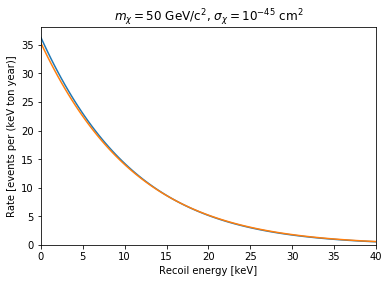

In [8]:
# NR's
energies = np.linspace(0.001, 40, 100)

# dr/dr
dr = wr.rate_wimp_std(energies, mw=50, sigma_nucleon=1e-45)

plt.plot(energies, dr)

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.title("$m_\chi = 50$ GeV/c${}^2$, $\sigma_\chi = 10^{-45}$ cm${}^2$")
plt.xlim(0, energies.max())
plt.ylim(0, None);

use_SHM = dddm.SHM()
dr_shm = wr.rate_wimp_std(energies, mw=50, sigma_nucleon=1e-45, halo_model = use_SHM)
plt.plot(energies, dr_shm, label = "Modified SHM")


## Detector smearing

In [9]:
import DirectDmTargets as dddm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
# _bin_low, _bin_high, _nbin = 0.001, 40, 10
# for _bin in tqdm(dddm.get_bins(_bin_low, _bin_high, _nbin)):
#     x = _bin.mean()
#     y = dddm.N_r(_bin[0], _bin[1], 1, smearing = False)
#     plt.scatter(x,y, c = 'r')
# for _bin in tqdm(dddm.get_bins(_bin_low, _bin_high, _nbin)):
#     x = _bin.mean()
#     y = dddm.N_r(_bin[0], _bin[1], 1, smearing = True)
#     plt.scatter(x,y, c = 'b', label = 'smeared')
    
# plt.ylabel("N events [keV$^{-1}$]")
# plt.xlabel("Recoil energy [keV]")

In [11]:
# TO DO

# Inference #
Below we setup the inference

# Emcee #
<https://emcee.readthedocs.io/en/stable/tutorials/quickstart/>

In [12]:
import pandas as pd

In [13]:
import scipy

In [14]:
import emcee
emcee.__version__

'3.0.0'

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [15]:
benchmark = {'mw':50, 'sigma_nucleon':1e-45}

In [16]:
use_SHM = dddm.SHM()
xe_events = dddm.GenSpectrum(50, 10e-45, use_SHM, dddm.detectors['Xe'])
xe_data = xe_events.get_data(poisson = True)
xe_data

,counts,bin_centers,bin_left,bin_right
0,4526.0,5.0,0.0,10.0
1,1696.0,15.0,10.0,20.0
2,638.0,25.0,20.0,30.0
3,209.0,35.0,30.0,40.0
4,65.0,45.0,40.0,50.0
5,17.0,55.0,50.0,60.0
6,4.0,65.0,60.0,70.0
7,2.0,75.0,70.0,80.0
8,0.0,85.0,80.0,90.0
9,0.0,95.0,90.0,100.0


Ar


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.05it/s]
c:\users\joran\google drive\phd-master\ubuntu-storage\windows-anaconda\dd_dm_targets\DirectDmTargets\plot_basics.py:80: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  plt.plot(sigma_nucleon, plr, linestyle = 'steps-mid')


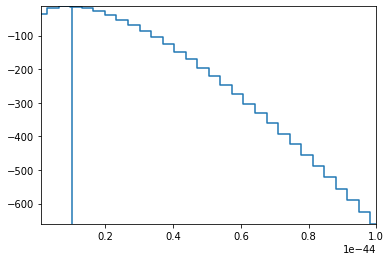

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.61it/s]
c:\users\joran\google drive\phd-master\ubuntu-storage\windows-anaconda\dd_dm_targets\DirectDmTargets\plot_basics.py:99: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  plt.plot(mass, plr, linestyle = 'steps-mid')


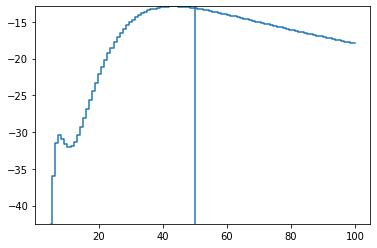

Xe


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 62.23it/s]


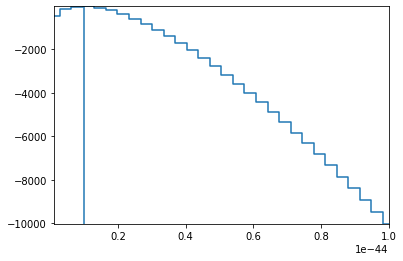

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.87it/s]


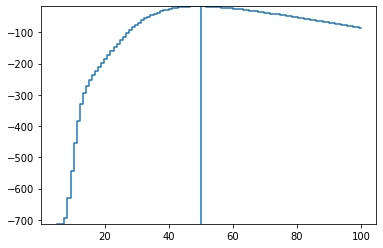

Ge


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 61.53it/s]


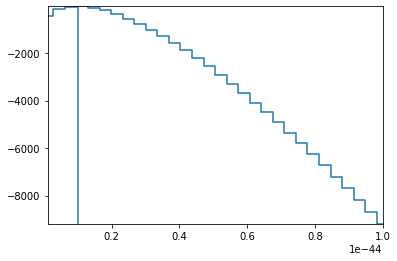

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.46it/s]


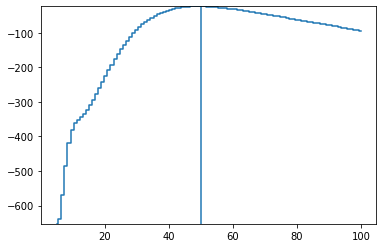

In [17]:
for det in ['Ar', 'Xe', 'Ge']:
    print(det)
    dddm.plt_ll_sigma_spec(det)
    plt.show()
    dddm.plt_ll_mass_spec(det)
    plt.show()

Ar


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]
c:\users\joran\google drive\phd-master\ubuntu-storage\windows-anaconda\dd_dm_targets\DirectDmTargets\plot_basics.py:115: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  plt.plot(sigma_nucleon, plr, linestyle = 'steps-mid')


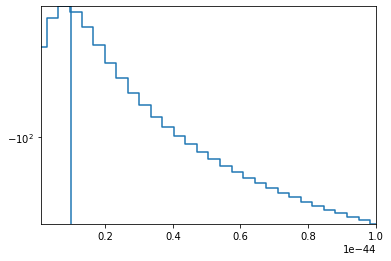

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.45it/s]
c:\users\joran\google drive\phd-master\ubuntu-storage\windows-anaconda\dd_dm_targets\DirectDmTargets\plot_basics.py:132: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  plt.plot(mass, plr, linestyle = 'steps-mid')


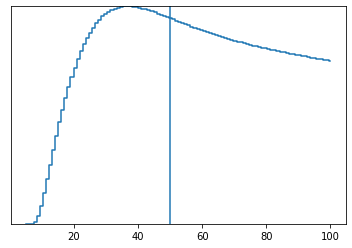

In [18]:
# for det in ['Ar', 'Xe', 'Ge']:
for det in ['Ar']:
    print(det)
    dddm.plt_ll_sigma_det(det)
    plt.yscale('symlog')
    plt.show()
    dddm.plt_ll_mass_det(det)
#     plt.xlim(49,55)
    plt.yscale('symlog')
    plt.show()

In [19]:
use_SHM = dddm.SHM()
spec50 = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors['Ar'])
spec50.get_data(poisson = False)

,counts,bin_centers,bin_left,bin_right
0,1.295004,5.0,0.0,10.0
1,9.926446,15.0,10.0,20.0
2,6.909109,25.0,20.0,30.0
3,4.232348,35.0,30.0,40.0
4,2.545784,45.0,40.0,50.0
5,1.505676,55.0,50.0,60.0
6,0.875853,65.0,60.0,70.0
7,0.500644,75.0,70.0,80.0
8,0.278469,85.0,80.0,90.0
9,0.132936,95.0,90.0,100.0


In [20]:
use_SHM = dddm.SHM()
spec47 = dddm.DetectorSpectrum(49.2, 1e-45, use_SHM, dddm.detectors['Ar'])
spec47.get_data(poisson = False)

,counts,bin_centers,bin_left,bin_right
0,1.308769,5.0,0.0,10.0
1,10.009411,15.0,10.0,20.0
2,6.927444,25.0,20.0,30.0
3,4.216098,35.0,30.0,40.0
4,2.518604,45.0,40.0,50.0
5,1.478778,55.0,50.0,60.0
6,0.853559,65.0,60.0,70.0
7,0.483840,75.0,70.0,80.0
8,0.266701,85.0,80.0,90.0
9,0.126258,95.0,90.0,100.0


In [21]:
use_SHM = dddm.SHM()
spec52 = dddm.DetectorSpectrum(52, 1e-45, use_SHM, dddm.detectors['Ar'])
spec52.get_data(poisson = False)

,counts,bin_centers,bin_left,bin_right
0,1.261422,5.0,0.0,10.0
1,9.719970,15.0,10.0,20.0
2,6.855469,25.0,20.0,30.0
3,4.263534,35.0,30.0,40.0
4,2.605978,45.0,40.0,50.0
5,1.567621,55.0,50.0,60.0
6,0.928434,65.0,60.0,70.0
7,0.541040,75.0,70.0,80.0
8,0.307238,85.0,80.0,90.0
9,0.149477,95.0,90.0,100.0


In [22]:
def approx_log_fact(n):
    """take the approximate logarithm of factorial n for large n

    :param n: the number n
     :return:  ln(n!)"""
    assert n >= 0, f"Only take the logarithm of n>0. (n={n})"

    # if n is small, there is no need for approximation
    if n < 10:
#     try:
        # gamma equals factorial for x -> x +1 & returns results for non-int
        return np.log(np.math.gamma(n + 1))
#     except OverflowError:
    else:
#         print(n)
        # Stirling's approx. <https://nl.wikipedia.org/wiki/Formule_van_Stirling>
        return (n * np.log(n) 
                - n 
                + 0.5 * np.log(2 * np.pi *n) 
                + 1 / (12 * n) 
                - 1 / (360 * (n **3))
                + 1 / (1260 * (n**5))
                - 1/ (1680 * (n**7))
                )

In [23]:
def real_fact(n):
    return np.log(np.math.gamma(n + 1))

In [24]:
n = np.linspace(0.2,110,200)
y = [approx_log_fact(ni) for ni in n] 
yprime = [real_fact(ni) for ni in n] 
# plt.yscale('log')

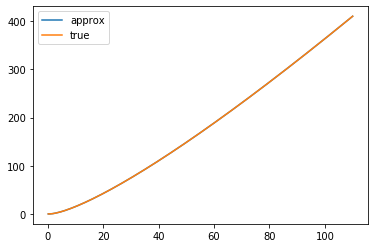

In [25]:
plt.plot(n,y, label = 'approx');
plt.plot(n,yprime, label = 'true');
plt.legend();

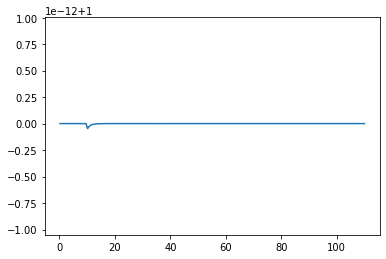

In [26]:
# plt.plot(n,, label = 'approx');
plt.plot(n,np.array(y)/np.array(yprime));

In [27]:
assert False
dddm.show_ll_function()

AssertionError: 

In [ ]:
def show_ll_function(npoints = 1e4, clip_val = -1e4, min_val = 0.1):
    from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, \
        title, show
    from matplotlib.colors import LogNorm
    x = np.arange(0, npoints, 1)
    y = np.arange(0, npoints, 1)
    X, Y = meshgrid(x, y)  # grid of point
    Z = -dddm.ll_element_wise(X, Y, clip_val)
    im = imshow(Z, cmap=cm.RdBu,
                norm=LogNorm(min_val, -clip_val))  # drawing the function
    colorbar(im, label='$-\mathcal{L}$')  # adding the colobar on the right
    title('$-\mathcal{L}$ clipped at %i' % (clip_val))
    plt.xlabel("Nb")
    plt.ylabel("Nr")
    show()

In [ ]:
show_ll_function()